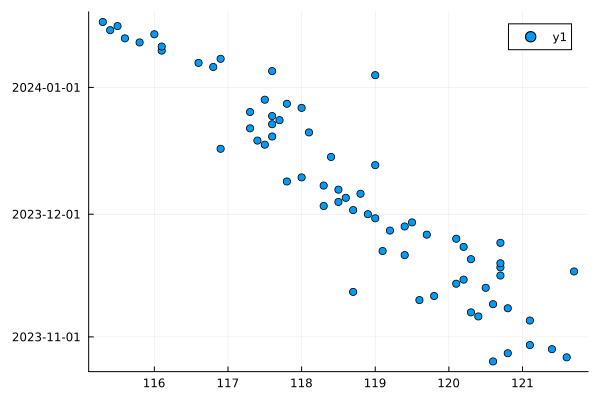

In [41]:
using Dates
using Plots

# Vetor de datas
dias = [
    Date(2023, 10, 26), Date(2023, 10, 27), Date(2023, 10, 28), Date(2023, 10, 29), Date(2023, 10, 30),
    Date(2023, 11, 5), Date(2023, 11, 6), Date(2023, 11, 7), Date(2023, 11, 8), Date(2023, 11, 9),
    Date(2023, 11, 10), Date(2023, 11, 11), Date(2023, 11, 12), Date(2023, 11, 13), Date(2023, 11, 14),
    Date(2023, 11, 15), Date(2023, 11, 16), Date(2023, 11, 17), Date(2023, 11, 18), Date(2023, 11, 19),
    Date(2023, 11, 20), Date(2023, 11, 21), Date(2023, 11, 22), Date(2023, 11, 23), Date(2023, 11, 24),
    Date(2023, 11, 25), Date(2023, 11, 26), Date(2023, 11, 27), Date(2023, 11, 28), Date(2023, 11, 29),
    Date(2023, 11, 30), Date(2023, 12, 1), Date(2023, 12, 2), Date(2023, 12, 3), Date(2023, 12, 4),
    Date(2023, 12, 5), Date(2023, 12, 6), Date(2023, 12, 7), Date(2023, 12, 8), Date(2023, 12, 9),
    Date(2023, 12, 10), Date(2023, 12, 13), Date(2023, 12, 15), Date(2023, 12, 17), Date(2023, 12, 18),
    Date(2023, 12, 19), Date(2023, 12, 20), Date(2023, 12, 21), Date(2023, 12, 22), Date(2023, 12, 23),
    Date(2023, 12, 24), Date(2023, 12, 25), Date(2023, 12, 26), Date(2023, 12, 27), Date(2023, 12, 28),
    Date(2023, 12, 29), Date(2024, 1, 4), Date(2024, 1, 5), Date(2024, 1, 6), Date(2024, 1, 7),
    Date(2024, 1, 8), Date(2024, 1, 10), Date(2024, 1, 11), Date(2024, 1, 12), Date(2024, 1, 13),
    Date(2024, 1, 14), Date(2024, 1, 15), Date(2024, 1, 16), Date(2024, 1, 17)
]

# Vetor de pesos
A = [
    120.6, 121.6, 120.8, 121.4, 121.1, 121.1, 120.4, 120.3, 120.8, 120.6,
    119.6, 119.8, 118.7, 120.5, 120.1, 120.2, 120.7, 121.7, 120.7, 120.7,
    120.3, 119.4, 119.1, 120.2, 120.7, 120.1, 119.7, 119.2, 119.4, 119.5,
    119.0, 118.9, 118.7, 118.3, 118.5, 118.6, 118.8, 118.5, 118.3, 117.8,
    118.0, 119.0, 118.4, 116.9, 117.5, 117.4, 117.6, 118.1, 117.3, 117.6,
    117.7, 117.6, 117.3, 118.0, 117.8, 117.5, 119.0, 117.6, 116.8, 116.6,
    116.9, 116.1, 116.1, 115.8, 115.6, 116.0, 115.4, 115.5, 115.3
]

scatter(A, dias)

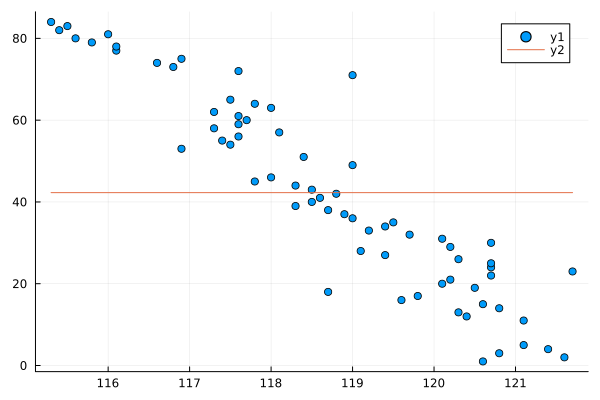

In [43]:
# Data inicial
dia1 = minimum(dias)

# Transformar as datas em números sequenciais começando em 1
y = [Dates.value(date - dia1) + 1 for date in dias]

#regressao de grau 0
A0 = ones(69, 1)
C0 = A0 \ y

E0 = A0*C0 .- y
somaE0 = sum(E0 .^2)

scatter(A, y)
plot!(A, C0[1] .* ones(69))

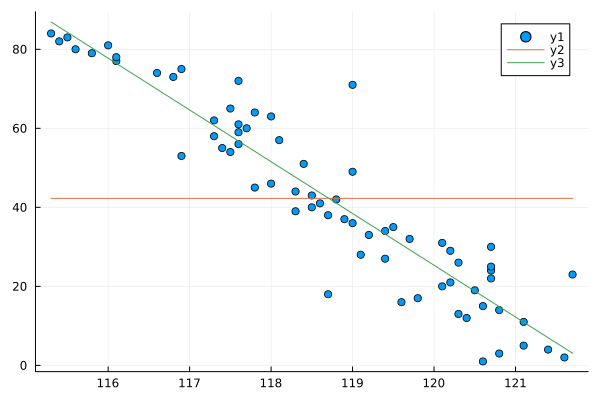

In [44]:
#regressao com grau 1
A1 = hcat(A0, A)
C1 = A1 \ y

E1 = A1*C1 .- y
somaE1 = sum(E1 .^ 2)

plot!(A, C1[1] .+ C1[2].*A)

In [47]:
# Calculando y para A = 110 (qual dia vou atingir 110kg)
y110 = C1[1] + C1[2] * 110

#transformando y_for_A110 em int
y110_int = Int(round(y110))

# Transformar o valor de volta para a data correspondente
data110 = dia1 + Day(y110_int - 1)

println("A data correspondente para y quando A = 110 é: ", data110)

A data correspondente para y quando A = 110 é: 2024-03-29


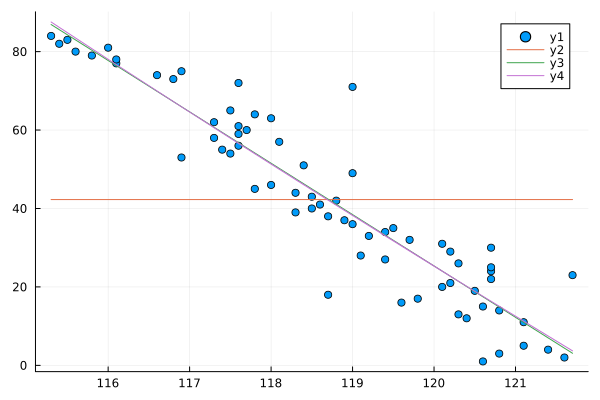

In [49]:
#regressao com grau 2
A2 = hcat(A1, A.^2)
C2 = A2 \ y

E2 = A2*C2 .- y
somaE2 = sum(E2 .^ 2)

plot!(A, C2[1] .+ C2[2].*A .+ C2[3].* A.^2)

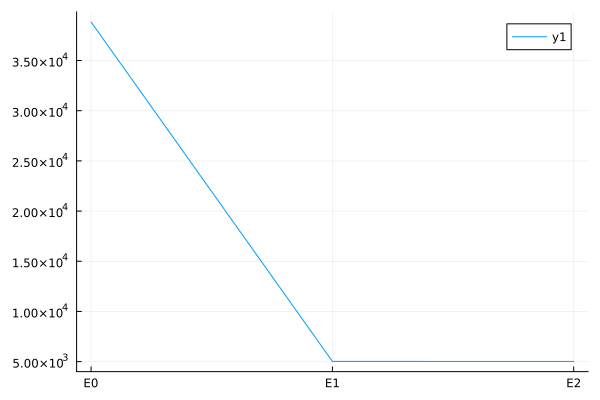

In [52]:
#plotando o erro
erro = [somaE0, somaE1, somaE2]
eixoX = ["E0", "E1", "E2"]
plot(eixoX, erro)